# **TALLER DE RECURSION Y ARBOLES**

INTEGRANTES:

1. Daniel Jaramillo Bustamante


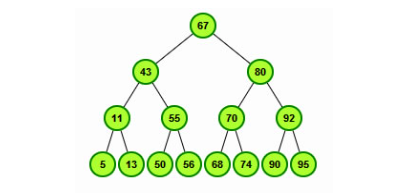

**PREGUNTA 1  (25%)**

* implementa la prueba para El siguiente algoritmo usando para ello el arbol dado en la figura.
* Documente cada una de las líneas del algoritmo.
*  Calcule y gráfique (use librerias python) el costo computacional de este algoritmos y como los mejoraria.

In [18]:
class TreeNode1(object):
    """
    Representa un nodo en un árbol, cada nodo puede tener múltiples hijos.

    Esta clase permite construir árboles donde cada nodo puede tener varios hijos,

    Args:
        value (Any): El valor que almacena el nodo.
        children (List[TreeNode1]): Lista de nodos hijos conectados a este nodo.
    """
    def __init__(self, value=None):
        self.value = value
        self.children = []

    def add_child(self, node):
        """Añade un nodo hijo a este nodo.
        Args:
            node (TreeNode1): El nodo hijo a añadir.
        Returns:
            TreeNode1: El nodo actual con el nuevo hijo añadido.
        """
        self.children.append(node)
        return self

    def to_indented_string(self, level):
            """
        Permite obtener una representación en cadena del árbol a partir de este nodo,
        con indentación que refleja el nivel de cada nodo.

            Args:
                level (int): Nivel de profundidad actual para controlar la indentación.

            Returns:
                str: Representación del árbol desde este nodo hacia abajo.
                
            Nota:
            El caso base ocurre cuando un nodo no tiene hijos (es decir, len(self.children) == 0).
            Aquí la recursión se detiene y se imprime únicamente el valor del nodo.
            Si hay hijos, la función se llama recursivamente para cada uno, aumentando el nivel
            de indentación del con cada llamada (level + 1).
            """
            # Cada nivel añade dos espacios de indentación
            s = " " * level * 2 + str(self.value) + "\n"
            # Para cada hijo, llama recursivamente aumentando el nivel
            if len(self.children) > 0:
                s += "".join([i.to_indented_string(level + 1) for i in self.children])
            return s

    def __repr__(self):
            return self.to_indented_string(level=0)

In [19]:
class TreeNode2(TreeNode1):
    """
    Esta clase extiende a TreeNode1 y le agrega funcionalidades count_leaves, height, grade.
    No agrega nuevos atributos, solo métodos adicionales para trabajar con el árbol.
    """

    def count_leaves(self) -> int:
        """
        Cuenta cuántas hojas tiene el árbol desde este nodo.

        Una hoja es un nodo que no tiene hijos. Si un nodo no tiene hijos,
        entonces él mismo cuenta como una hoja. Si tiene hijos, se suman las hojas
        de cada subárbol recursivamente.
        """
        # Caso base: si no hay hijos, es una hoja
        if len(self.children) == 0:
            return 1
        # Caso recursivo: sumar hojas de todos los hijos
        return sum([i.count_leaves() for i in self.children])

    def height(self) -> int:
        """
        Calcula la altura del árbol desde este nodo.

        La altura se define como el número de niveles desde el nodo actual
        hasta la hoja más lejana. Si no hay hijos, la altura es 0.
        """
        import numpy as np

        # Caso base: sin hijos, altura 0
        if len(self.children) == 0:
            return 0

        # Caso recursivo: buscamos la mayor altura entre los hijos y le sumamos 1
        return np.max([i.height() for i in self.children]) + 1

    def grade(self) -> int:
        """
        Retorna el grado máximo del árbol.

        El grado de un nodo es la cantidad de hijos que tiene.
        El grado máximo del árbol es el número más alto de hijos encontrado en cualquier nodo.
        """
        import numpy as np

        # Comparamos el número de hijos actuales con el grado de todos los subárboles
        return np.max([len(self.children)] + [i.grade() for i in self.children])


### **Estructura de arbol en lista.**

### 🌳 Representación recursiva del árbol

Vamos a representar el árbol utilizando una **tupla anidada**, donde cada elemento contiene:

- El **valor del nodo**
- Y una **lista de sus hijos**, cada uno con su propia estructura `(valor, [hijos])`

Este enfoque evita tener que crear manualmente muchas instancias de la clase `TreeNode2`, manteniendo el código limpio y escalable.

### Estructura del árbol


| Nivel        | Nodo padre | Hijos              |
|--------------|------------|--------------------|
| **Nivel 1**  | 67         | 43, 80             |
| **Nivel 2**  | 43         | 11, 55             |
|              | 80         | 70, 92             |
| **Nivel 3**  | 11         | 5, 13              |
|              | 55         | 50, 56             |
|              | 70         | 68, 74             |
|              | 92         | 90, 95             |

```python
estructura_arbol = (
    67,
    [
        (43, [(11, [(5, []), (13, [])]), (55, [(50, []), (56, [])])]),
        (80, [(70, [(68, []), (74, [])]), (92, [(90, []), (95, [])])]),
    ],
)
```

### **Función para implementar la prueba del arbol**

In [20]:
from typing import List, Tuple

def construir_arbol(data: Tuple[int, List[Tuple[int, List]]]) -> TreeNode2:
    """Construye un árbol a partir de una tupla que contiene un valor y una lista de hijos.

    Args:
        data (Tuple[int, List[Tuple[int, List]]]): Tupla que contiene un valor y una lista de hijos, donde cada hijo es otra tupla con su propio valor y lista de hijos. Hasta replicar el arbol de la imagen.

    Returns:
        TreeNode2: Un objeto TreeNode2 que representa el árbol construido a partir de los datos proporcionados.
    """
    valor, hijos = data 
    nodo = TreeNode2(valor) 
    for hijo in hijos: nodo.add_child(construir_arbol(hijo))
    return nodo


### **Implementación de prueba**


In [21]:
estructura_arbol = (
    67,
    [
        (43, [(11, [(5, []), (13, [])]), (55, [(50, []), (56, [])])]),
        (80, [(70, [(68, []), (74, [])]), (92, [(90, []), (95, [])])]),
    ],
)
nodo_raiz = construir_arbol(estructura_arbol)

# Pruebas
print(nodo_raiz)
print("Cantidad de hojas:", nodo_raiz.count_leaves())
print("Altura del árbol:", nodo_raiz.height())
print("Grado máximo:", nodo_raiz.grade())

67
  43
    11
      5
      13
    55
      50
      56
  80
    70
      68
      74
    92
      90
      95

Cantidad de hojas: 8
Altura del árbol: 3
Grado máximo: 2


### Análisis de Complejidad Computacional — `TreeNode1`

La clase `TreeNode1` permite representar un árbol genérico (no binario), donde cada nodo puede tener múltiples hijos.

A continuación se detalla el análisis de complejidad de sus métodos principales.

---

#### Constructor `__init__`

| Instrucción                     | Descripción                          | Complejidad |
|---------------------------------|--------------------------------------|-------------|
| self.value = value            | Asigna el valor al nodo              | O(1)        |
| self.children = []           | Crea la lista vacía de hijos         | O(1)        |

Todas las instrucciones son operaciones simples y no dependen del tamaño del árbol ni de la posición del nodo.

$$
T_n = O(1) + O(1) = 2 \cdot O(1) = O(1)
$$

Complejidad total del constructor: **O(1)**

---

#### Método `add_child(node)`

| Instrucción                      | Descripción                         | Complejidad |
|----------------------------------|-------------------------------------|-------------|
| self.children.append(node)     | Agrega un hijo al nodo              | O(1)        |

Solo se ejecuta una instrucción de inserción en una lista.

$$
T_n = O(1)
$$

Complejidad total de `add_child`: **O(1)**

---

#### Método `to_indented_string(level)`

| Instrucción                                                                 | Descripción                                         | Complejidad   |
|------------------------------------------------------------------------------|-----------------------------------------------------|----------------|
| " " * level * 2 + str(self.value) + "\n"                                  | Construye la línea con indentación                  | O(1)           |
| "".join([i.to_indented_string(level+1) for i in self.children])           | Recorre e imprime recursivamente los hijos          | O(n)           |

La llamada recursiva se realiza **una vez por cada nodo del árbol**, así que la complejidad se acumula proporcional al total de nodos.

$$
T_n = O(1) + O(n) = O(n)
$$

Complejidad total de `to_indented_string`:** **O(n)

---

#### Método `__repr__()`

| Instrucción                        | Descripción                            | Complejidad |
|------------------------------------|----------------------------------------|-------------|
| self.to_indented_string(0)       | Imprime el árbol desde el nodo raíz    | O(n)        |

Este método simplemente invoca a `to_indented_string`. Por lo tanto comparte su complejidad

$$
T_n = O(n)
$$

**Complejidad total de `__repr__`:** **O(n)**

---

**Resumen** 

- El constructor y el método `add_child` son **constantes**: O(1)
- Los métodos que recorren el árbol (`to_indented_string`, `__repr__`) tienen complejidad **lineal** respecto al número de nodos: O(n)




### Análisis de Complejidad Computacional — TreeNode2

La clase `TreeNode2` extiende la funcionalidad de `TreeNode1` añadiendo tres métodos adicionales para recorrer y analizar el árbol:

- **count_leaves()**: Cuenta el número de nodos hoja.
- **height()**: Calcula la altura total del árbol.
- **grade()**: Determina el grado máximo del árbol (cantidad máxima de hijos en cualquier nodo).

---

#### Método count_leaves()

| Instrucción                                | Descripción                                        | Complejidad |
|--------------------------------------------|----------------------------------------------------|-------------|
| len(self.children) == 0                    | Verifica si el nodo es una hoja                    | O(1)        |
| sum([i.count_leaves() for i in self.children]) | Llama recursivamente a cada hijo para contar hojas | O(n)        |

El método visita todos los nodos del árbol **una sola vez**. En cada uno se hace una comprobación y una suma.

$$
T_n = O(1) + O(n) = O(n)
$$

Complejidad total de count_leaves: **O(n)**

---

#### Método height()

| Instrucción                             | Descripción                                             | Complejidad |
|-----------------------------------------|---------------------------------------------------------|-------------|
| len(self.children) == 0                | Verifica si el nodo es hoja                             | O(1)        |
| [i.height() for i in self.children]    | Calcula recursivamente la altura de cada hijo           | O(n)        |
| np.max(...) + 1                        | Toma el valor máximo y suma uno                         | O(n)        |

Se recorre el árbol completamente para encontrar la rama más profunda. La llamada recursiva se realiza una vez por cada nodo.

$$
T_n = O(1) + O(n) + O(n) = O(n)
$$

Complejidad total de height: **O(n)**

---

#### Método grade()

| Instrucción                          | Descripción                                                  | Complejidad |
|--------------------------------------|--------------------------------------------------------------|-------------|
| len(self.children)                  | Obtiene el número de hijos del nodo actual                   | O(1)        |
| [i.grade() for i in self.children]  | Llama recursivamente para obtener el grado de cada subárbol  | O(n)        |
| np.max(...)                         | Calcula el valor máximo entre todos los grados               | O(n)        |

En este caso, el método explora todos los nodos y compara sus cantidades de hijos para determinar cuál es el mayor.

$$
T_n = O(1) + O(n) + O(n) = O(n)
$$

Complejidad total de grade: **O(n)**

---

**Resumen final**:

| Método         | Complejidad |
|----------------|-------------|
| count_leaves   | O(n)        |
| height         | O(n)        |
| grade          | O(n)        |

Todos los métodos recorren completamente el árbol una vez, lo cual los hace eficientes y lineales respecto al número total de nodos.


### **Gráfica del proceso escalando el tamaño del arbol**

In [22]:
import timeit
import matplotlib.pyplot as plt


def clonar_arboles(cantidad):
    """
    Construye un árbol con una raíz principal llamada 'Raíz' y le añade múltiples
    copias de un subárbol base (definido por la estructura 'estructura_arbol').

    Este método permite generar árboles más grandes duplicando una estructura fija varias veces,
    útil para pruebas de rendimiento, visualización, o simulaciones con árboles n-arios.

    Args:
        cantidad (int): Número de veces que se desea clonar e insertar el subárbol base.

    Returns:
        TreeNode1: Nodo raíz de un nuevo árbol con 'cantidad' subárboles clonados como hijos directos.
    
    Ejemplo de uso:
        >>> arbol = clonar_arboles(3)
        El árbol resultante tendrá una raíz con 3 subárboles idénticos pegados directamente.
    """

    # Crear la raíz principal del árbol con el valor "Raíz"
    raiz = TreeNode1("Raíz")
    
    # Repetir la inserción 'cantidad' veces
    for _ in range(cantidad):
        # Construir un nuevo subárbol a partir de la estructura base
        subarbol = construir_arbol(estructura_arbol)
        
        # Añadir el subárbol como hijo directo de la raíz
        raiz.add_child(subarbol)

    # Devolver el árbol completo con los subárboles añadidos
    return raiz


### **Explicación clonación por que escalar un arbol con n subarboles.**

Nota: `**¿Por qué no usar TreeNode2?**`
    
Aunque TreeNode2 tiene métodos adicionales como count_leaves, height y grade, la capacidad de crear arboles clonados no requiere de estas funcionalidades adicionales. Además, el método de crear un arbol se extiende a TreeNode2 desde el método `**construir_arbol**`, por lo que es valido usar TreeNode1 para esta tarea de clonación.
    
`**¿Por qué clonamos arboles escalando la estructura base?**`
    
En este ejemplo quiero crear un arbol desde una raiz e ir añadiendo subarboles clonados todos iguales equivalentes al arbol de la imagen consignada en la tupla  **'estructura_arbol'.**

La raiz tendrá un valor `"Raíz"` y cada subárbol será una copia de la estructura definida por `'estructura_arbol'`, habran tantas copias como se indique en el parámetro 'cantidad'.

Para entenderlo mejor si **cantidad = 1** tendremos: 

```
Raíz
 |   
 ├── 67
    ├── 43
    │   ├── 11
    │   │   ├── 5
    │   │   └── 13
    │   └── 55
    │       ├── 50
    │       └── 56
    └── 80
        ├── 70
        │   ├── 68
        │   └── 74
        └── 92
            ├── 90
            └── 95
```

Si **cantidad = 2** tenemos
```
Raíz
 |   
 ├── 67         SUB_ARBOL 1
 │   ├── 43
 │   │   ├── 11
 │   │   │   ├── 5
 │   │   │   └── 13
 │   │   └── 55
 │   │       ├── 50
 │   │       └── 56
 │   └── 80
 │       ├── 70
 │       │   ├── 68
 │       │   └── 74
 │       └── 92
 │           ├── 90
 │           └── 95
 |
 ├── 67         SUB_ARBOL 2
    ├── 43
    │   ├── 11
    │   │   ├── 5
    │   │   └── 13
    │   └── 55
    │       ├── 50
    │       └── 56
    └── 80
        ├── 70
        │   ├── 68
        │   └── 74
        └── 92
            ├── 90
            └── 95
```


    
Se propone con el fin de medir el tiempo del método que cada  al crear un arbol con la misma estructura, pero con cada vez más subarboles. Todo esto se realiza con el objetivo de ver una grafica que exprese mejor el comportamiento lineal y que pueda aumentar en el tiempo ya que el proceso basico de crear el arbol base y solo repetirlo es tan infimo que no da una buena grafica y es suceptible a que cpu haga de las suyas en el proceso al contrar con una data tan reducida**


Nota: **Puede no ser exacto al detalle lo que pide el enunciado pero permite creo, apreciar el crecimiento lineal y entender la imagen real del costo computacional, me fue más claro a mi aprendizaje, en caso de tener cualquier observación se espera con agrado retroalientación por parte del docente.**


### **Grafica clasica con un arbol cada vez mas grande**

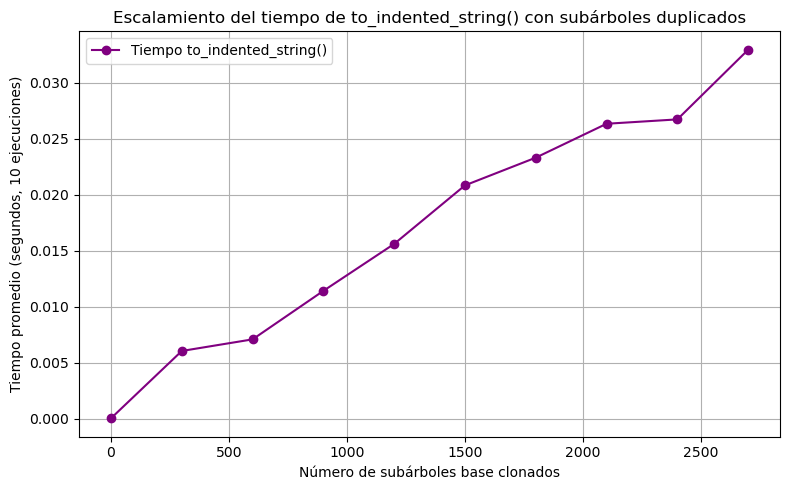

In [23]:
# Medición de tiempos usando timeit
cantidades = list(range(1, 3000, 300))  # de 1 a 50000 en pasos de 500
tiempos = []

for c in cantidades:
    arbol = clonar_arboles(c)
    tiempo_prom = timeit.timeit(lambda: arbol.to_indented_string(0), number=10) / 10
    tiempos.append(tiempo_prom)


# Graficar los resultados método clasico.
plt.figure(figsize=(8, 5))
plt.plot(cantidades, tiempos, marker='o', color='purple', label='Tiempo to_indented_string()')
plt.title("Escalamiento del tiempo de to_indented_string() con subárboles duplicados")
plt.xlabel("Número de subárboles base clonados")
plt.ylabel("Tiempo promedio (segundos, 10 ejecuciones)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()